In [61]:
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## PHQ-9

In [62]:
main_path = "./cleaned_data/surveys/"

phq9 = pd.read_csv(f"{main_path}clean_PHQ-9.csv")

In [63]:
print(phq9.head(2))

   uid type  Little interest or pleasure in doing things  \
0  u00  pre                                            0   
1  u01  pre                                            1   

   Feeling down, depressed, hopeless.  \
0                                   1   
1                                   1   

   Trouble falling or staying asleep, or sleeping too much.  \
0                                                  0          
1                                                  1          

   Feeling tired or having little energy  Poor appetite or overeating  \
0                                      1                            0   
1                                      1                            0   

   Feeling bad about yourself or that you are a failure or have let yourself or your family down  \
0                                                  0                                               
1                                                  1                                 

In [64]:
phq9_misc = phq9[(phq9["type"] != "pre") & (phq9["type"] != "post")]

phq9_pre = phq9[phq9["type"] == "pre"]
phq9_post = phq9[phq9["type"] == "post"]

# for column in phq9.columns:
#     print(column)
# print(phq9_post)

## Independent Variables

In [65]:
main_folder = "./cleaned_data/EMA/"

df_behaviour = pd.read_csv(f"{main_folder}Behaviour_new.csv")
df_class = pd.read_csv(f"{main_folder}Class_new.csv")
df_events = pd.read_csv(f"{main_folder}Events.csv")
df_exercise = pd.read_csv(f"{main_folder}Exercise.csv")
df_mood = pd.read_csv(f"{main_folder}Mood_new.csv")
df_sleep = pd.read_csv(f"{main_folder}Sleep.csv")
df_social = pd.read_csv(f"{main_folder}Social.csv")
df_stress = pd.read_csv(f"{main_folder}Stress_new.csv")
df_class2 = pd.read_csv(f"{main_folder}Class2.csv")

In [66]:
print("Behaviour")
print(df_behaviour.head())
print("\n")
print("Class")
print(df_class.head())
print("\n")
print("Events")
print(df_events.head())
print("\n")
print("Exercise")
print(df_exercise.head())
print("\n")
print("Mood")
print(df_mood.head())
print("\n")
print("Sleep")
print(df_sleep.head())
print("\n")
print("Social")
print(df_social.head())
print("\n")
print("Stress")
print(df_stress.head())
print("\n")
print(df_class2.head())

Behaviour
  user_id  anxious  calm  conventional  critical  dependable  disorganized  \
0     u00        4   4.0           5.0         2         3.0           3.0   
1     u00        5   3.0           3.0         1         4.0           4.0   
2     u00        4   3.0           3.0         3         4.0           2.0   
3     u00        4   5.0           2.0         1         4.0           3.0   
4     u00        3   3.0           3.0         3         3.0           3.0   

   enthusiastic  experiences  reserved   resp_time  sympathetic  \
0           4.0          4.0       3.0  1365455068          4.0   
1           4.0          3.0       1.0  1365621587          4.0   
2           4.0          4.0       2.0  1366145919          4.0   
3           5.0          3.0       1.0  1366229877          4.0   
4           3.0          4.0       3.0  1366663342          4.0   

                datetime_utc  
0  2013-04-08 21:04:28+00:00  
1  2013-04-10 19:19:47+00:00  
2  2013-04-16 20:58:39+00

In [67]:
print(df_behaviour.columns)
print("\n")
print(df_class.columns)
print("\n")
print(df_events.columns)
print("\n")
print(df_exercise.columns)
print("\n")
print(df_mood.columns)
print("\n")
print(df_sleep.columns)
print("\n")
print(df_social.columns)
print("\n")
print(df_stress.columns)
print("\n")
print(df_class2.columns)

Index(['user_id', 'anxious', 'calm', 'conventional', 'critical', 'dependable',
       'disorganized', 'enthusiastic', 'experiences', 'reserved', 'resp_time',
       'sympathetic', 'datetime_utc'],
      dtype='object')


Index(['user_id', 'course_id', 'due', 'experience', 'hours', 'location',
       'resp_time', 'datetime_utc'],
      dtype='object')


Index(['user_id', 'resp_time', 'datetime_utc', 'positive_event_score',
       'negative_event_score', 'emotion_range', 'has_positive_text',
       'has_negative_text', 'positive_text', 'negative_text', 'location'],
      dtype='object')


Index(['user_id', 'resp_time', 'weekday', 'hour', 'exercise', 'walk', 'have',
       'schedule', 'latitude', 'longitude', 'has_location'],
      dtype='object')


Index(['user_id', 'happy', 'happyornot', 'location', 'resp_time', 'sad',
       'sadornot', 'datetime_utc'],
      dtype='object')


Index(['user_id', 'resp_time', 'datetime_utc', 'sleep_hours', 'sleep_quality',
       'sleepiness', 'location'

In [68]:
col_behaviour = [
    "user_id",
    "datetime_utc",
    "anxious",
    "calm",
    "conventional",
    "critical",
    "dependable",
    "disorganized",
    "enthusiastic",
    "experiences",
    "reserved",
    # "resp_time",
    "sympathetic",
]
df_behaviour = df_behaviour[col_behaviour]
df_behaviour["datetime_utc"] = pd.to_datetime(
    df_behaviour["datetime_utc"], format="mixed", errors="coerce"
)


col_class = [
    "user_id",
    "datetime_utc",
    "course_id",
    "due",
    "experience",
    "hours",
    # "location",
    # "resp_time",
]
df_class["course_id"] = (
    df_class["course_id"].astype(str).str.strip().str.lower().replace("nan", pd.NA)
)
df_class = df_class[col_class]
df_class["datetime_utc"] = pd.to_datetime(
    df_class["datetime_utc"], format="mixed", errors="coerce"
)

col_events = [
    "user_id",
    # "resp_time",
    "datetime_utc",
    "positive_event_score",
    "negative_event_score",
    "emotion_range",
    "has_positive_text",
    "has_negative_text",
    # "positive_text",
    # "negative_text",
    # "location",
]
df_events = df_events[col_events]
df_events["datetime_utc"] = pd.to_datetime(
    df_events["datetime_utc"], format="mixed", errors="coerce"
)


df_exercise = df_exercise.rename(columns={"resp_time": "datetime_utc"})
col_exercise = [
    "user_id",
    "datetime_utc",
    # "weekday",
    # "hour",
    "exercise",
    "walk",
    "have",
    "schedule",
    # "latitude",
    # "longitude",
    # "has_location",
]
df_exercise = df_exercise[col_exercise]
df_exercise["datetime_utc"] = pd.to_datetime(
    df_exercise["datetime_utc"], format="mixed", errors="coerce"
)

col_mood = [
    "user_id",
    "datetime_utc",
    "happy",
    "happyornot",
    # "location",
    # "resp_time",
    "sad",
    "sadornot",
]
df_mood = df_mood[col_mood]
df_mood["datetime_utc"] = pd.to_datetime(
    df_mood["datetime_utc"], format="mixed", errors="coerce"
)

col_sleep = [
    "user_id",
    # "resp_time",
    "datetime_utc",
    "sleep_hours",
    "sleep_quality",
    "sleepiness",
    # "location",
]
df_sleep = df_sleep[col_sleep]
df_sleep["datetime_utc"] = pd.to_datetime(
    df_sleep["datetime_utc"], format="mixed", errors="coerce"
)

col_social = [
    "user_id",
    # "resp_time",
    "datetime_utc",
    "number",
    # "location"
]
df_social = df_social[col_social]
df_social["datetime_utc"] = pd.to_datetime(
    df_social["datetime_utc"], format="mixed", errors="coerce"
)

col_stress = [
    "user_id",
    "datetime_utc",
    "level",
    # "location",
    # "resp_time"
]
df_stress = df_stress[col_stress]
df_stress["datetime_utc"] = pd.to_datetime(
    df_stress["datetime_utc"], format="mixed", errors="coerce"
)

col_class2 = [
    "user_id",
    # "resp_time",
    "datetime_utc",
    "challenge",
    "effort",
    "grade",
    # "location",
]

df_class2 = df_class2[col_class2]
df_class2["datetime_utc"] = pd.to_datetime(
    df_class2["datetime_utc"], format="mixed", errors="coerce"
)

In [69]:
print(df_behaviour.columns)
print("\n")
print(df_class.columns)
print("\n")
print(df_events.columns)
print("\n")
print(df_exercise.columns)
print("\n")
print(df_mood.columns)
print("\n")
print(df_sleep.columns)
print("\n")
print(df_social.columns)
print("\n")
print(df_stress.columns)
print("\n")
print(df_class2.columns)

Index(['user_id', 'datetime_utc', 'anxious', 'calm', 'conventional',
       'critical', 'dependable', 'disorganized', 'enthusiastic', 'experiences',
       'reserved', 'sympathetic'],
      dtype='object')


Index(['user_id', 'datetime_utc', 'course_id', 'due', 'experience', 'hours'], dtype='object')


Index(['user_id', 'datetime_utc', 'positive_event_score',
       'negative_event_score', 'emotion_range', 'has_positive_text',
       'has_negative_text'],
      dtype='object')


Index(['user_id', 'datetime_utc', 'exercise', 'walk', 'have', 'schedule'], dtype='object')


Index(['user_id', 'datetime_utc', 'happy', 'happyornot', 'sad', 'sadornot'], dtype='object')


Index(['user_id', 'datetime_utc', 'sleep_hours', 'sleep_quality',
       'sleepiness'],
      dtype='object')


Index(['user_id', 'datetime_utc', 'number'], dtype='object')


Index(['user_id', 'datetime_utc', 'level'], dtype='object')


Index(['user_id', 'datetime_utc', 'challenge', 'effort', 'grade'], dtype='object')


## Forward Filling and organizing data in 6 hour blocks

In [70]:
def fill_and_expand_to_days(
    df,
    user_col="user_id",
    time_col="datetime_utc",
    value_cols=[],
    default_quarter="06:00:00",
):
    df = df.copy()
    df["date"] = df[time_col].dt.floor("D")
    df["time"] = df[time_col].dt.time.astype(str)

    def get_quarter(t):
        h = int(t.split(":")[0])
        if h < 6:
            return "Q1"
        elif h < 12:
            return "Q2"
        elif h < 18:
            return "Q3"
        else:
            return "Q4"

    df["quarter"] = df["time"].apply(get_quarter)

    # Pivot to wide format (1 row per date per user, with Q1–Q4 columns)
    df_wide = df.pivot_table(
        index=[user_col, "date"], columns="quarter", values=value_cols, aggfunc="first"
    )

    # Flatten columns (e.g. ('anxious', 'Q1') → 'anxious_Q1')
    df_wide.columns = [f"{col}_{qtr}" for col, qtr in df_wide.columns.to_flat_index()]
    df_wide = df_wide.reset_index()

    # Forward fill across days for each user
    filled_rows = []
    for user_id, group in df_wide.groupby(user_col):
        group = group.set_index("date").sort_index()
        full_range = pd.date_range(
            start=group.index.min(), end=group.index.max(), freq="D"
        )
        expanded = group.reindex(full_range)

        expanded[user_col] = user_id
        expanded.index.name = "date"
        expanded = expanded.reset_index()

        expanded = expanded.sort_values(["user_id", "date"])
        expanded.update(expanded.groupby(user_col).ffill())

        filled_rows.append(expanded)

    df_filled = pd.concat(filled_rows, ignore_index=True)

    # Reshape back to long-form (quarter-specific)
    df_long = pd.wide_to_long(
        df_filled,
        stubnames=value_cols,
        i=["user_id", "date"],
        j="quarter",
        sep="_",
        suffix="Q[1-4]",
    ).reset_index()

    # Add quarter times to date to restore full datetime_utc
    quarter_to_time = {
        "Q1": "03:00:00",
        "Q2": "09:00:00",
        "Q3": "15:00:00",
        "Q4": "21:00:00",
    }
    df_long["datetime_utc"] = pd.to_datetime(
        df_long["date"].astype(str) + " " + df_long["quarter"].map(quarter_to_time)
    )
    df_long = df_long.drop(columns=["date", "quarter"])
    df_long = df_long.sort_values(["user_id", "datetime_utc"])

    return df_long

In [71]:
# Define datasets and value columns to preserve
datasets = {
    "behaviour": [
        "anxious",
        "calm",
        "conventional",
        "critical",
        "dependable",
        "disorganized",
        "enthusiastic",
        "experiences",
        "reserved",
        "sympathetic",
    ],
    "class": ["course_id", "due", "experience", "hours"],
    "class2": ["challenge", "effort", "grade"],
    "events": [
        "positive_event_score",
        "negative_event_score",
        "emotion_range",
        "has_positive_text",
        "has_negative_text",
    ],
    "exercise": ["exercise", "walk", "have", "schedule"],
    "mood": ["happy", "happyornot", "sad", "sadornot"],
    "sleep": ["sleep_hours", "sleep_quality", "sleepiness"],
    "social": ["number"],
    "stress": ["level"],
}

# Loop through each and apply the function
filled_dfs = {}

for name, value_cols in datasets.items():
    df = globals()[f"df_{name}"]
    globals()[f"filled_{name}"] = fill_and_expand_to_days(
        df,
        user_col="user_id",
        time_col="datetime_utc",
        value_cols=value_cols,
    )

/var/folders/f4/vybgzbbx1sg165hn_kn98j0m0000gn/T/ipykernel_10839/1149165133.py:71: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["datetime_utc"] = pd.to_datetime(
/var/folders/f4/vybgzbbx1sg165hn_kn98j0m0000gn/T/ipykernel_10839/1149165133.py:71: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["datetime_utc"] = pd.to_datetime(
/var/folders/f4/vybgzbbx1sg165hn_kn98j0m0000gn/T/ipykernel_10839/1149165133.py:71: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["datetime_utc"] = pd.to_datetime(
/var/folders/f4/vybgzbbx1sg165hn_kn98j0m0000gn/T/ipykernel_10839/11

In [72]:
# Check what filled dataframes exist
filled_keys = [key for key in globals().keys() if key.startswith("filled_")]
print("Found filled DataFrames:", filled_keys)

# Create a list of those DataFrames
filled_dfs_list = [
    globals()[key] for key in filled_keys if isinstance(globals()[key], pd.DataFrame)
]

# Merge only if we have at least one DataFrame
if filled_dfs_list:
    from functools import reduce

    if len(filled_dfs_list) == 1:
        merged_df = filled_dfs_list[0]
    else:
        merged_df = reduce(
            lambda left, right: pd.merge(
                left, right, on=["user_id", "datetime_utc"], how="outer"
            ),
            filled_dfs_list,
        )

    merged_df.sort_values(["user_id", "datetime_utc"], inplace=True)
    merged_df.reset_index(drop=True, inplace=True)

    print("Merged DataFrame shape:", merged_df.shape)
    display(merged_df.head())
else:
    print("No filled DataFrames available to merge.")

Found filled DataFrames: ['filled_dfs', 'filled_behaviour', 'filled_class', 'filled_class2', 'filled_events', 'filled_exercise', 'filled_mood', 'filled_sleep', 'filled_social', 'filled_stress', 'filled_keys', 'filled_dfs_list']
Merged DataFrame shape: (10652, 37)


,user_id,anxious,calm,conventional,critical,dependable,disorganized,enthusiastic,experiences,reserved,sympathetic,datetime_utc,course_id,due,experience,hours,challenge,effort,grade,positive_event_score,negative_event_score,emotion_range,has_positive_text,has_negative_text,exercise,walk,have,schedule,happy,happyornot,sad,sadornot,sleep_hours,sleep_quality,sleepiness,number,level
0,u00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-25 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-25 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-25 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-25 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,1.0,NaN,2.0
4,u00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-26 03:00:00+00:00,cs65,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0


In [73]:
print(merged_df.head(2))

  user_id  anxious  calm  conventional  critical  dependable  disorganized  \
0     u00      NaN   NaN           NaN       NaN         NaN           NaN   
1     u00      NaN   NaN           NaN       NaN         NaN           NaN   

   enthusiastic  experiences  reserved  sympathetic              datetime_utc  \
0           NaN          NaN       NaN          NaN 2013-03-25 03:00:00+00:00   
1           NaN          NaN       NaN          NaN 2013-03-25 09:00:00+00:00   

  course_id  due  experience  hours  challenge  effort  grade  \
0       NaN  NaN         NaN    NaN        NaN     NaN    NaN   
1       NaN  NaN         NaN    NaN        NaN     NaN    NaN   

   positive_event_score  negative_event_score  emotion_range  \
0                   NaN                   NaN            NaN   
1                   NaN                   NaN            NaN   

   has_positive_text  has_negative_text  exercise  walk  have  schedule  \
0                NaN                NaN       NaN   NaN  

In [76]:
pre_df = phq9[phq9["type"] == "pre"].copy()
post_df = phq9[phq9["type"] == "post"].copy()
phq_combined = pd.merge(
    post_df[["uid", "total_score"]], pre_df, on="uid", suffixes=("_post", "_pre")
)

latest_features = (
    merged_df.sort_values("datetime_utc").groupby("user_id").last().reset_index()
)

# Merge everything together
model_df = pd.merge(
    phq_combined, latest_features, left_on="uid", right_on="user_id", how="left"
)

In [77]:
# Create input: just the 9 PHQ9 pre-question answers
phq9_questions = [
    col
    for col in pre_df.columns
    if col not in ["uid", "type", "Response", "total_score", "depression_severity"]
]
X = model_df[phq9_questions].values
y = model_df["total_score_post"].values  # or one-hot encode 'depression_severity'

In [78]:
# (samples, timesteps, features) → each PHQ9 question is a timestep
X = X.reshape((X.shape[0], X.shape[1], 1))

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model
model = Sequential(
    [
        LSTM(64, input_shape=(X.shape[1], 1)),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dense(1),  # For regression (total_score); use softmax if predicting category
    ]
)

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train it
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Invalid dtype: object

In [80]:
first_datetime = merged_df["datetime_utc"].min()
last_datetime = merged_df["datetime_utc"].max()

print("First datetime:", first_datetime)
print("Last datetime:", last_datetime)

First datetime: 2013-03-25 03:00:00+00:00
Last datetime: 2013-08-16 21:00:00+00:00


In [83]:
phq9_df = phq9
# Create a new column 'date' and assign values based on condition
phq9_df["date"] = pd.NaT  # initialize the column with NaT (not-a-time)
phq9_df.loc[phq9_df["type"] == "pre", "date"] = first_datetime
phq9_df.loc[phq9_df["type"] == "post", "date"] = last_datetime

/var/folders/f4/vybgzbbx1sg165hn_kn98j0m0000gn/T/ipykernel_10839/3945839469.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2013-03-25 03:00:00+00:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  phq9_df.loc[phq9_df["type"] == "pre", "date"] = first_datetime


In [88]:
import numpy as np

# Parameters
SEQUENCE_LENGTH = 10  # number of time steps to look back
merged_features = [
    col for col in merged_df.columns if col not in ["user_id", "datetime_utc"]
]  # keep only feature columns
phq9_questions = [
    col
    for col in phq9_df.columns
    if col.startswith("Little")
    or col.startswith("Feeling")
    or col.startswith("Trouble")
]

X, y = [], []

# Loop through users with a post survey
for uid in phq9_df["uid"].unique():
    post_row = phq9_df[(phq9_df["uid"] == uid) & (phq9_df["type"] == "post")]
    pre_row = phq9_df[(phq9_df["uid"] == uid) & (phq9_df["type"] == "pre")]

    if post_row.empty or pre_row.empty:
        continue

    post_time = post_row.iloc[0]["date"]
    target_score = post_row.iloc[0]["total_score"]

    # Select merged rows before the post time
    user_behavior = merged_df[
        (merged_df["user_id"] == uid) & (merged_df["datetime_utc"] < post_time)
    ].sort_values("datetime_utc")

    if len(user_behavior) < SEQUENCE_LENGTH:
        continue  # skip if not enough data

    # Get last N rows
    seq = (
        user_behavior[merged_features].tail(SEQUENCE_LENGTH).values
    )  # shape (seq_len, features)

    # Optionally: Add PHQ9 pre responses to each timestep (as extra features)
    phq9_vector = pre_row[phq9_questions].values.flatten()
    phq9_broadcast = np.tile(
        phq9_vector, (SEQUENCE_LENGTH, 1)
    )  # repeat for each timestep

    combined = np.hstack(
        [seq, phq9_broadcast]
    )  # final shape (seq_len, features + phq9)

    X.append(combined)
    y.append(target_score)

In [92]:
X = np.stack(X)  # shape (n_samples, seq_len, features)
y = np.array(y)  # shape (n_samples,)

print(X.shape)
print(y.shape)

(38, 10, 41)
(38,)


In [94]:
print("X type:", type(X))
print("X dtype:", getattr(X, "dtype", "N/A"))
print("X shape:", getattr(X, "shape", "N/A"))

if isinstance(X, list):
    print("Sample X[0] shape:", np.array(X[0]).shape)
    print("X[0] type:", type(X[0]))

print("y type:", type(y))
print("y dtype:", getattr(y, "dtype", "N/A"))
print("y shape:", getattr(y, "shape", "N/A"))

X type: <class 'numpy.ndarray'>
X dtype: object
X shape: (38, 10, 41)
y type: <class 'numpy.ndarray'>
y dtype: int64
y shape: (38,)


In [103]:
# Print first 5 rows to check what is inside
# for i in range(5):
#     print(f"X[{i}] type: {type(X[i])}, dtype: {getattr(X[i], 'dtype', 'N/A')}")
#     print(X[i])

X = np.nan_to_num(X, nan=0)

for i, sample in enumerate(X):
    for j, row in enumerate(sample):
        for k, val in enumerate(row):
            if isinstance(val, str):
                print(f"String found at X[{i}][{j}][{k}]: {val}")


import numpy as np

# Identify which columns contain any strings
num_samples, num_rows, num_cols = X.shape
cols_to_drop = []

for col in range(num_cols):
    for sample in X:
        for row in sample:
            if isinstance(row[col], str):
                cols_to_drop.append(col)
                break
        if col in cols_to_drop:
            break

# Get the columns to keep
cols_to_keep = [i for i in range(num_cols) if i not in cols_to_drop]

# Drop those columns
X_cleaned = X[:, :, cols_to_keep]

# Replace NaNs and convert
X_cleaned = np.nan_to_num(X_cleaned, nan=0)
X_cleaned = X_cleaned.astype(np.float32)

print("Old shape:", X.shape)
print("New shape:", X_cleaned.shape)

X_cleaned = X_cleaned.astype(np.float32)

String found at X[5][1][10]: cs50
String found at X[5][2][10]: cs65
String found at X[5][5][10]: cs50
String found at X[7][2][10]: cs65
String found at X[7][6][10]: japn61
String found at X[14][1][10]: cs50
String found at X[14][2][10]: cs50
String found at X[14][3][10]: cs50
String found at X[14][5][10]: cs50
String found at X[15][1][10]: cs65 cs77
String found at X[15][2][10]: cs65
String found at X[15][5][10]: cs65 cs77
String found at X[15][6][10]: cs65
String found at X[15][9][10]: cs65 cs77
Old shape: (38, 10, 41)
New shape: (38, 10, 40)


In [110]:
print(np.isnan(y).any())  # Should be False
print(np.isinf(y).any())  # Should be False

print(np.isnan(X_cleaned).any())  # Should be False
print(np.isinf(X_cleaned).any())  # Should be False

X_cleaned = np.nan_to_num(X_cleaned, nan=0.0, posinf=0.0, neginf=0.0)

False
False
True
False


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.0573 - mae: 6.1477  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.1724 - mae: 5.7298 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 55.4283 - mae: 5.4055 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.1584 - mae: 5.5218 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.3263 - mae: 5.0151 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.5998 - mae: 4.6496 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.3496 - mae: 3.7028
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.6242 - mae: 4.1605 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.2691 - mae: 3.8341 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8683 - mae: 3.4972 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7759 - mae: 3.2518
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.2484 - mae: 3.8954
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

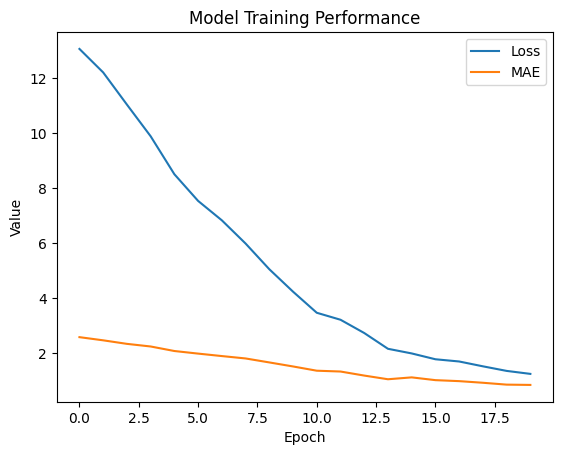

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential(
    [
        LSTM(64, input_shape=(X_cleaned.shape[1], X_cleaned.shape[2])),
        Dense(32, activation="relu"),
        Dense(1),  # or more depending on your target shape
    ]
)

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(X_cleaned, y, epochs=20, batch_size=16)

import matplotlib.pyplot as plt

history = model.fit(X_cleaned, y, epochs=20, batch_size=16)  # Save the result of fit()

plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["mae"], label="MAE")
plt.title("Model Training Performance")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42
)
model = Sequential(
    [
        LSTM(64, input_shape=(X_cleaned.shape[1], X_cleaned.shape[2])),
        Dense(32, activation="relu"),
        Dense(1),  # or more depending on your target shape
    ]
)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 80.1406 - mae: 6.3100  
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 62.0610 - mae: 5.4911 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 57.7346 - mae: 5.3070 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 65.8701 - mae: 5.7519 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 66.3125 - mae: 5.3230
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.3719 - mae: 4.8581
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 61.6934 - mae: 5.0844
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.6004 - mae: 4.4606
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.8647 - mae: 4.2148
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 54.2418 - mae: 4.5435
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.6892 - mae: 3.4583
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.1773 - mae: 3.7421
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

In [ ]:
y_pred = model.predict(X_test)
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True: {true:.2f}, Predicted: {pred[0]:.2f}")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten if needed
y_true = y_test.flatten()
y_pred = y_pred.flatten()

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
True: 15.00, Predicted: 7.79
True: 8.00, Predicted: 7.08
True: 8.00, Predicted: 7.10
True: 12.00, Predicted: 8.60
True: 1.00, Predicted: 7.92
True: 0.00, Predicted: 4.13
True: 8.00, Predicted: 5.28
True: 4.00, Predicted: 7.94


NameError: name 'predictions' is not defined